In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np

%matplotlib inline

In [211]:
china_map = gpd.read_file('../data/shapefiles/China.shp')

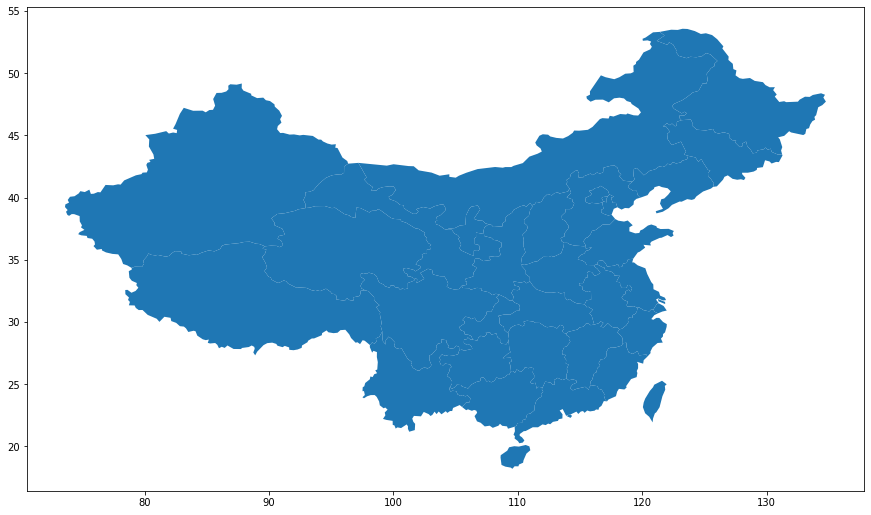

In [212]:
fig, ax = plt.subplots(figsize = (15, 15))
china_map.plot(ax = ax)

In [225]:
train = pd.read_csv("../data/csvs/split/train.csv", index_col="index")

In [226]:
train.head()

,longitude,latitude,Waccess,access,lst,pet,pop.1,urban,adj_cases
index,,,,,,,,,
128,108.8523,31.03847,-1.029790,-1.048688,-1.094926,-0.240211,1.340388,0.791722,1.814154
935,112.7700,34.73000,-1.478398,-1.467565,-0.295413,0.737672,2.773557,2.727613,0.000000
227,105.0565,34.10804,-0.567336,-0.335427,0.277322,-0.470704,0.746703,0.809682,0.459729
1247,121.7500,42.72000,-0.399357,-0.945488,0.063672,0.641952,0.746576,2.402087,0.000000
208,118.8534,30.68815,-1.482588,-0.117957,-0.667219,-0.043913,0.860191,1.081039,0.350999


In [215]:
val = pd.read_csv("../data/csvs/split/validation.csv", index_col="index")

In [216]:
val.head()

,longitude,latitude,Waccess,access,lst,pet,pop.1,urban,adj_cases
index,,,,,,,,,
875,108.0400,33.07000,-0.945792,-0.722612,-1.643476,-0.128730,0.553296,-0.482502,0.000000
741,90.1400,29.44000,0.944795,-0.529619,1.916048,0.938376,0.167540,1.201010,0.000000
140,117.0851,36.73414,-1.068546,-2.341113,-0.417257,0.882027,2.681869,2.898725,0.238772
951,111.6300,35.30000,-1.166025,-3.286129,-0.116150,0.704088,1.908249,2.286606,0.000000
926,103.5400,34.61000,-0.402537,0.191373,0.700884,-0.624167,0.581317,1.189395,0.000000


In [217]:
test = pd.read_csv("../data/csvs/split/test.csv", index_col="index")

In [218]:
test.head()

,longitude,latitude,Waccess,access,lst,pet,pop.1,urban,adj_cases
index,,,,,,,,,
1059,110.2300,37.78000,-0.730897,-0.977029,-0.088249,0.822235,0.843780,-0.482502,0.000000
1105,114.1800,38.85000,-0.936291,-1.470343,-0.001269,0.917901,1.254492,2.152542,0.000000
617,118.9800,26.92000,-1.170349,-0.762511,-0.285592,-0.153465,1.113425,1.416281,0.000000
32,116.0257,28.66149,-2.249219,-2.249629,-0.148006,0.300495,2.544032,2.087914,1.960786
147,103.4879,23.33841,-0.260404,-1.690688,-0.063718,-0.128620,1.274887,0.748944,0.128787


In [219]:
def get_geo_dataframe(data):
    geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
    geo_df = gpd.GeoDataFrame(data, geometry = geometry)
    # coordinate system initialisation
    geo_df.crs = "EPSG:4326"
    return geo_df

In [243]:
def plot_map(data):
    geo_df = get_geo_dataframe(data)
    fig, ax = plt.subplots(figsize = (15, 15))
    china_map.plot(ax = ax, alpha = 0.4, color = "lightgrey", edgecolor='black')
    geo_df.plot(column = "adj_cases", ax = ax, markersize = 5,  cmap="autumn", legend=True)
    

In [246]:
train["adj_cases"].describe()

count    820.000000
mean       0.345071
std        2.338358
min        0.000000
25%        0.000000
50%        0.000000
75%        0.093241
max       53.239361
Name: adj_cases, dtype: float64

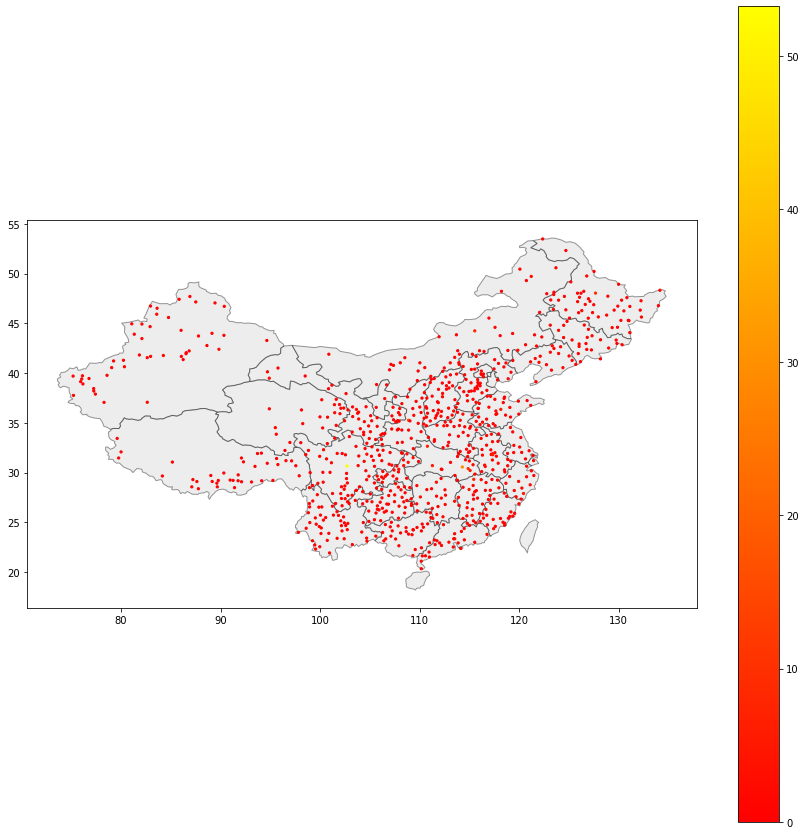

In [244]:
plot_map(train)

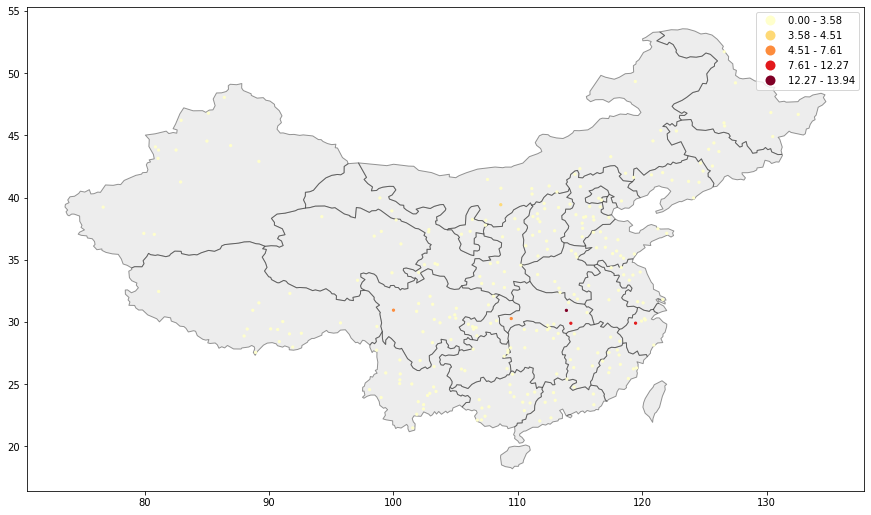

In [239]:
plot_map(val)

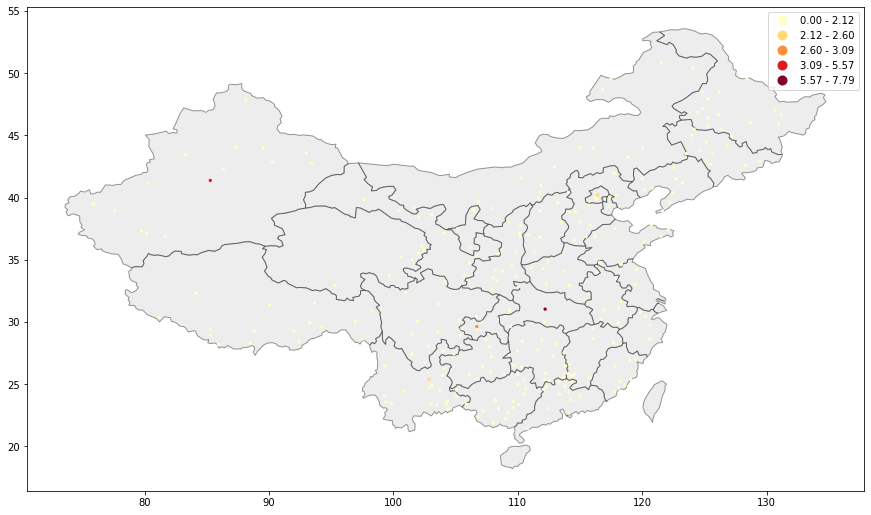

In [240]:
plot_map(test)